# MATH 136: Stochastic Processes

Stochastic processes are everywhere---in biology, finance, machine learning, control systems, and more. The goal of this exercise is to show how naturally stochastic processes can be simulated and encourage you to model your own real-world problems using these tools.

In [321]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from random import random
from scipy.ndimage import gaussian_filter1d as smooth

## I. Markov Chains

Imagine you are deciding whether to call a friend. The phone call stochastically affects your mood---if you call a friend while sad, you may become happy or angry afterwards. Whether you were happy, sad, or angry the day(s) before has no effect on your mood after the call. Only your present mood dictates how to call will go.

This process obeys the <b>Markov Chain</b> property, meaning that your future mood, $X_{t+1}$, depends only on your present mood, $X_t$. More formally,

$$
P(X_{t+1} = i_{t+1} | X_0 = i_0, X_1 = i_1, ..., X_{t-1} = i_{t-1}, X_t = i_t) = P(X_{t+1} = i_{t+1} | X_t = i_t)
$$

Where $X_0...X_{t-1}$ represents all past moods. In other words, this process is <b>memoryless</b>.

Let's represent this process as a <b>directed graph</b>.

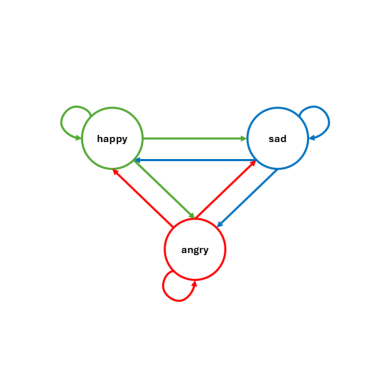

In [322]:
plt.imshow(img.imread('markov_chain.png'))
plt.axis('off')
plt.show()

This process has 3 states (happy, sad, angry) and 9 possible transitions (happy $\rightarrow$ sad, angry $\rightarrow$ happy, . . . )

We can define a <b>transition matrix</b>, $T$, which contains all probabilities of transitioning from one mood to another during the phone call. Lets abbreviate our states to (h, s, a) and visualize our transition matrix.

$$
T = \begin{bmatrix}
 t_{hh} & t_{hs} & t_{ha} \\
 t_{sh} & t_{ss} & t_{sa} \\
 t_{ah} & t_{as} & t_{aa} \\
\end{bmatrix}
$$

$t_{sh}$ is the probability of switching from sad to happy. $t_{aa}$ is the probabilty of answering the phone angry and remaining angry. And so on.

You might notice that each row of $T$ must sum to 1. As practice, let's define our own $T$. Replace the `None` entries below with probabilities.

In [323]:
# T = np.array([[None, None, None],
#               [None, None, None],
#               [None, None, None]])

T = np.array([[0.2, 0.3, 0.5],
              [0.9, 0.1, 0.0],
              [0.8, 0.1, 0.1]])

print("T: ", T)
for row in T:
    if np.sum(row) != 1:
        print("\nError: Each row of T must sum to 1.")

T:  [[0.2 0.3 0.5]
 [0.9 0.1 0. ]
 [0.8 0.1 0.1]]


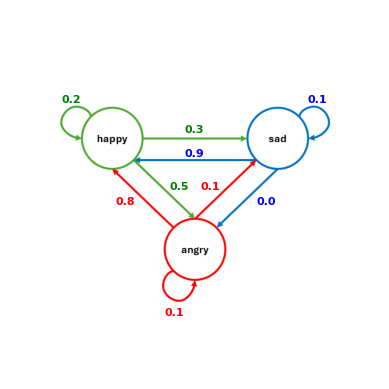

In [324]:
plt.imshow(img.imread('markov_chain.png'))
plt.text(100, 180, str(T[0,0]), color='green', fontsize=8, fontweight='bold')
plt.text(340, 240, str(T[0,1]), color='green', fontsize=8, fontweight='bold')
plt.text(310, 350, str(T[0,2]), color='green', fontsize=8, fontweight='bold')
plt.text(340, 285, str(T[1,0]), color='blue', fontsize=8, fontweight='bold')
plt.text(580, 180, str(T[1,1]), color='blue', fontsize=8, fontweight='bold')
plt.text(480, 380, str(T[1,2]), color='blue', fontsize=8, fontweight='bold')
plt.text(205, 380, str(T[2,0]), color='red', fontsize=8, fontweight='bold')
plt.text(370, 350, str(T[2,1]), color='red', fontsize=8, fontweight='bold')
plt.text(300, 595, str(T[2,2]), color='red', fontsize=8, fontweight='bold')
plt.axis('off')
plt.show()

We have now created and visualized a <b>Markov Chain</b> stochastic process.

## III. Martingales

Consider a lake on a day with a 50\% chance of rain. Let the water level in the lake be $X_n$.\
If it rains, the water level will increase to $X_{n+1} = X_n + 1$.\
If it does not rain, water will evaporate from the lake, decreasing the water level to $X_{n+1} = X_n - 1$.

Because $E[X_{n+1} | X_1,...,X_n] = 0.5(E[X_n] - 1) + 0.5(E[X_n] + 1) = E[X_n]$, this process is a <b>Martingale</b>. In other words, the conditional expectation of the next value equals the present value.

Martingale properties are useful in assessing long-term behavior or convergence of a process, which applies to problems like Brownian motion, random walk, etc.

## II. Galton-Watson Branching Process Example

This example shows how we can use Markov Chain and Martingale properties to make guarantees about biological populations.



Let's consider a population starting with only $1$ plant.\
Let $X_n$ = population size at generation $n$ = number of offspring produced by plants at generation $n-1$.\
Let $Y_{n,i}$ = number of offspring produced by plant $i$ at generation $n$.\
In a <b>Galton-Watson Branching Process</b>, organisms independently produce $k$ offspring with probability $p_k$ at each generation. That is,

$$P(Y_{n,i}=k) = p_k \quad \forall n \geq 0, i > 0.$$

This is a Markov Chain---the number of plants at the next generation, $X_{n+1}$, depends only on the present number of plants, $X_n$, and the offspring produced by generation $n-1$, $Y_{n,i}$. That is,

$$X_{n+1} = Y_{n,1} + Y_{n,2} + ... + Y_{n,x_n}.$$

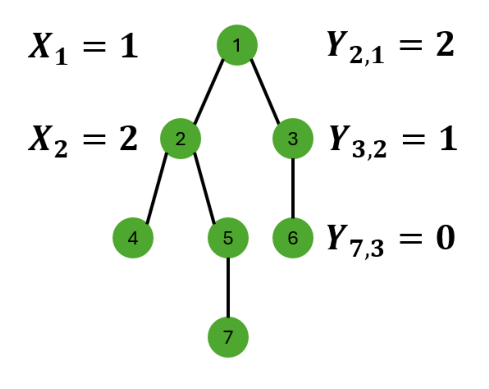

In [325]:
plt.imshow(img.imread('branching_process.png'))
plt.axis('off')
plt.show()

Let's assume each plant can produce between 0 to 2 offspring, and $p_0 = \frac{1}{6}$, $p_1 = \frac{1}{3}$, and $p_2 = \frac{1}{2}$.\
We can find the <b>probability of extinction, $\theta_{\infty}$</b>, using the Martingale Convergence Theorem.

If $E[Y_{n,i}] \leq 1$, our population goes extinct almost surely ($\theta_{\infty} = 1$).\
If $E[Y_{n,i}] > 1$, the plants have a chance of survival ($\theta_{\infty} < 1$).

Using a method outlined on p. 96-97 of [1], we find that <b>$\theta_{\infty} = \frac{1}{3}$</b> for our given probabilities $p_0, p_1, p_2$.

Let's simulate this process to confirm our $\theta_{\infty}$ is accurate.

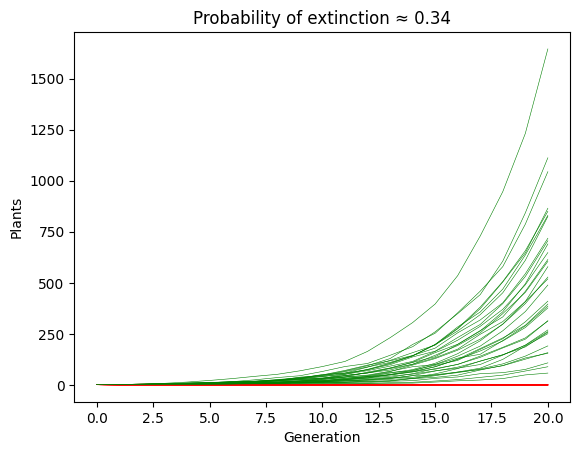

In [326]:
p = [1/6, 1/3, 1/2]
num_extinct = 0
num_sims = 50

for x in range(num_sims):
    population = [1] # start with a single plant
    for _ in range(20):
        new_pop = 0
        for _ in range(population[-1]):
            num_offspring = np.random.choice(len(p), p=p) #
            new_pop += num_offspring
        population.append(new_pop)
    num_extinct += (population[-1] == 0)
    color = 'green' if population[-1] > 0 else 'red'
    plt.plot(population, color=color, linewidth=0.4)

plt.title("Probability of extinction ≈ "+str(num_extinct/num_sims))
plt.xlabel("Generation")
plt.ylabel("Plants")
plt.show()

Due to computational limits, our estimate of $\theta_{\infty}$ may be slightly less than the true value, as some populations will survive many generations before extinction (which would be too costly to simulate). Fee free to experiment with the initial number of plants in $population$ and the offspring probability vector $p$ (must sum to 1).

## IV. Gambler's Ruin Example

This is a famous example of how we can use Martingale properties to model games.

A gambler starts with $x$ dollars.\
At each step, the gambler bets $1$ dollar on a coin flip, with a probability $p$ of winning and probability $q$ of losing.\
The game ends at time $T$ when the gambler has $0$ or $N$ dollars.

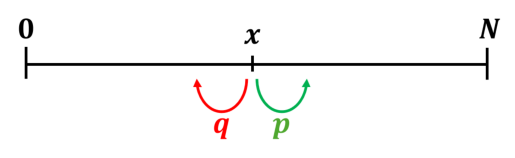

In [327]:
plt.imshow(img.imread('gamblers_ruin.png'))
plt.axis('off')
plt.show()

Let $X_n$ = dollars at time n.\
Suppose $p = q = 0.5$. Then, $X_n$ is a Martingale.\
By definition,

$$
E[X_T] = E[X_0] = x
$$.

If $X_T = 0$, the gambler makes 0 dollars.\
If $X_T = N$, the gambler makes N dollars.\
Therefore,

$$
E[X_T] = 0 \cdot P(X_T = 0) + N \cdot P(X_T = N) = Np_x
$$.

Since these two expressions are equal,

$$
p_x = \frac{x}{N}
$$

Let's simulate an example where the gambler starts with 10 dollars and ends with 0 or 50 dollars ($x = 10, N = 50$). We expect to win approximately 1/5 games.

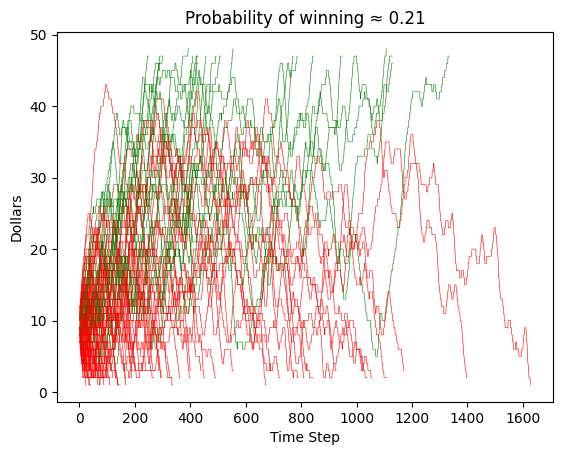

In [328]:
N = 50
p = 0.5 # fair game (p = q)
num_wins = 0
num_sims = 100

for i in range(num_sims):
    x = 10 # start with 10 dollars
    history = []
    while x > 0 and x < N: # while the game has not terminated...
        history.append(x)
        x += 1 if random() > p else -1
    num_wins += (x == N)
    color = 'green' if x == N else 'red'
    plt.plot(smooth(history, sigma=4), color=color, linewidth=0.4) # smoothing lines for visibility

plt.title("Probability of winning ≈ "+str(num_wins/num_sims))
plt.xlabel("Time Step")
plt.ylabel("Dollars")
plt.show()

With 50 simulations and <20 lines of code, we successfully estimate $p_x$. Feel free to experiment with different values of $x$, $N$, and $p$.

### References

[1] Lanchier, N. (2017). Stochastic Modeling. Springer. https://doi.org/10.1007/978-3-319-50038-6